## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

# 📊 Titanic: Eksploracyjna Analiza Danych (EDA)

**Cel:** Zbadanie czynników wpływających na przeżycie pasażerów RMS Titanic.  
**Źródło danych:** Historyczna katastrofa morska z 1912 roku.
![Titanic](https://upload.wikimedia.org/wikipedia/commons/3/31/TitanicBeken.jpg)

---

# ETAP 1 - ogólny przegląd danych

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
print('Rozmiar danych:', df.shape)

Rozmiar danych: (1310, 14)


In [5]:
print('Typy danych:\n')
print(df.dtypes)

Typy danych:

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [6]:
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


### Wnioski wstępne:

1. **Rozmiar danych**:
   - Zbiór danych zawiera **1310 wierszy** (rekordów pasażerów) oraz **14 kolumn** (zmiennych opisujących cechy każdego pasażera).
     

2. **Typy danych**:
   - Dane obejmują zarówno **zmienne liczbowe** (`float64` – np. `age`, `fare`, `sibsp`, `parch`), jak i **kategoryczne/tekstowe** (`object` – np. `sex`, `embarked`, `cabin`, `name`).
   - Zmienna `survived` ma typ liczbowy (`float64`), ale pełni funkcję **zmiennej binarnej**: `1` = przeżył, `0` = nie przeżył.
     

3. **Statystyki opisowe**:
   - Średni wiek pasażera: **~29.9 lat**, z przedziału **0.17 do 80 lat**.
   - Średnia liczba rodzeństwa/małżonków (`sibsp`) to **0.5**, a liczba rodziców/dzieci (`parch`) to **~0.4** – sugeruje, że większość pasażerów podróżowała samotnie.
   - Średnia cena biletu (`fare`) to **~33.30**, ale wartości maksymalne przekraczają **512 jednostek** – co świadczy o **mocnej skośności** rozkładu.
   - Kolumny tekstowe (`name`, `ticket`, `cabin`) mają dużą różnorodność wpisów – np. `cabin` zawiera aż 186 unikalnych oznaczeń.

---

📌 **Podsumowanie**:
Zbiór danych jest bogaty i różnorodny. Zawiera wartości liczbowe i kategoryczne, które potencjalnie wpływają na szanse przeżycia pasażerów. Już na tym etapie można przypuszczać, że wiek, klasa biletu, cena oraz płeć mogą odgrywać istotną rolę w przetrwaniu katastrofy.



# ETAP 2 – Brakujące Wartości


In [7]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Tabela brakujących wartości w zbiorze danych Titanic:


,Liczba braków,Procent braków (%)
body,1189,90.76
cabin,1015,77.48
boat,824,62.90
home.dest,565,43.13
age,264,20.15
embarked,3,0.23
fare,2,0.15
pclass,1,0.08
survived,1,0.08
name,1,0.08


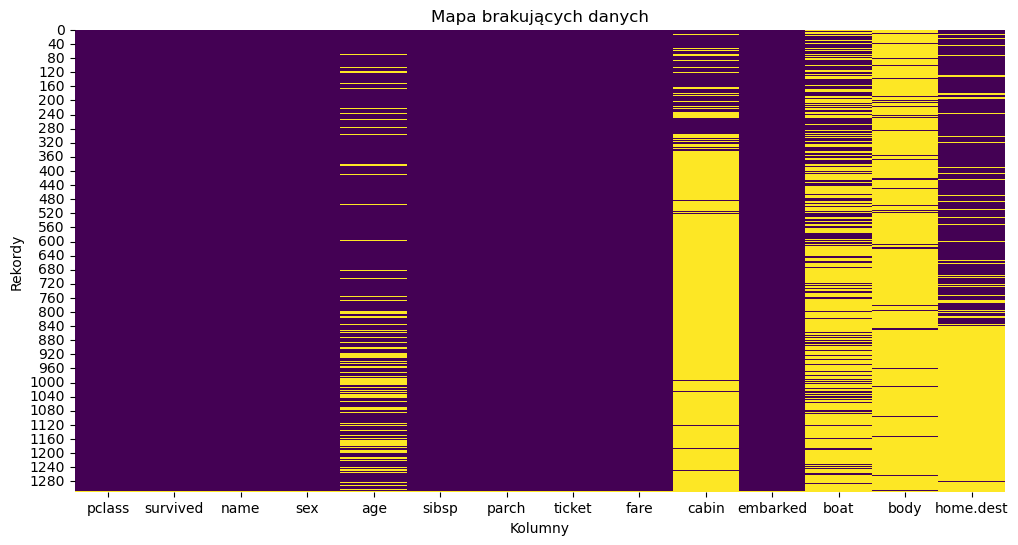

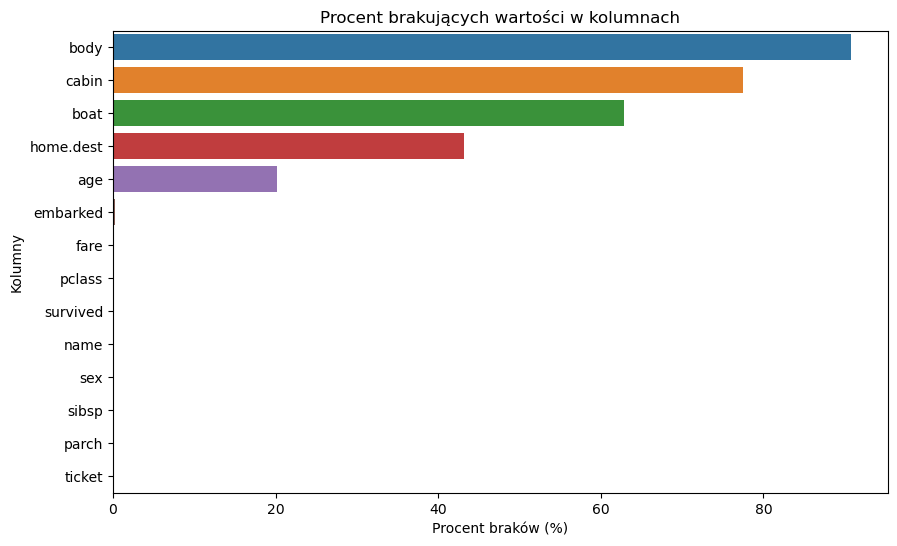

In [8]:
titanic_df = df
# 1. Sprawdzenie liczby braków w każdej kolumnie
missing_values = titanic_df.isnull().sum()

# 2. Procent brakujących wartości
missing_percentage = (missing_values / len(titanic_df)) * 100

# 3. Połączenie w tabelę
missing_data = pd.DataFrame({
    'Liczba braków': missing_values,
    'Procent braków (%)': missing_percentage.round(2)
}).sort_values(by='Procent braków (%)', ascending=False)

# Wyświetlenie tabeli braków
print("Tabela brakujących wartości w zbiorze danych Titanic:")
display(missing_data)

# 4. Wizualizacja heatmapy braków
plt.figure(figsize=(12,6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa brakujących danych')
plt.xlabel('Kolumny')
plt.ylabel('Rekordy')
plt.show()

# 5. Wykres - procent braków
plt.figure(figsize=(10,6))
sns.barplot(y='index', x='Procent braków (%)', data=missing_data.reset_index(), hue='index', palette="tab10", legend=False)
plt.title('Procent brakujących wartości w kolumnach')
plt.xlabel('Procent braków (%)')
plt.ylabel('Kolumny')
plt.show()



### Wnioski – Analiza brakujących wartości:

1. **Zakres braków**:<br>

   - W zbiorze danych Titanic występują znaczące braki w kilku kluczowych kolumnach.
   - Najwięcej braków jest w kolumnach:
     - `body` – brak numerów ciał dla ponad **90%** pasażerów - może być mało użyteczne (brak numeru ciała nie musi wpływać na przeżycie) → rozważę usunięcie.
     - `cabin` – brak przypisanej kabiny dla **77%** pasażerów - bardzo dużo braków, ale "posiadanie kabiny" może mieć wpływ na przeżycie → rozważę stworzenie cechy "czy posiadał kabinę".
     - `boat` – brak numeru łodzi ratunkowej dla **63%** pasażerów - dla analizy przeżycia istotne.
     - `home.dest` – brak miejsca docelowego dla **43%** pasażerów - mało istotne dla przeżycia → możliwe pominięcie w modelu.
   - W zmiennej `age` (wiek) brakuje danych dla około **20%** rekordów – istotne, ponieważ wiek może wpływać na przeżycie.
   - Minimalne braki występują również w `embarked`, `fare` oraz kilku pojedynczych wartościach w podstawowych kolumnach (`pclass`, `sex`, `sibsp`, `parch`, `ticket`, `name`) - dane łatwe do uzupełnienia.<br><br>

2. **Wizualizacja braków**:<br>

   - **Mapa braków** pokazała, że braki są silnie skoncentrowane w kolumnach `body`, `cabin`, `boat` i `home.dest`.
   - **Wykres procentowy** wyraźnie uwidocznił dominację tych zmiennych w liczbie braków.<br><br>

3. **Wnioski praktyczne**:<br>

   - Kolumny z bardzo dużą liczbą braków (`body`, `cabin`, `boat`) mogą być trudne do pełnego wykorzystania bez zaawansowanego uzupełnienia.
   - Kolumny z niewielką liczbą braków (`embarked`, `fare`, `age`) należy uzupełnić — np. medianą lub najczęściej występującą wartością.

---

📌 **Podsumowanie**:<br>

Analiza braków wskazuje, które zmienne są kompletne i gotowe do użycia, a które wymagają uzupełnienia lub specjalnego traktowania.  
W kolejnych etapach przygotowania danych konieczne będzie **uzupełnienie brakujących wartości** w kluczowych kolumnach.


# ETAP 3 – Analiza poszczególnych kolumn


Analiza poszczególnych kolumn to wspaniała okazja aby dowiedzieć się kim byli pasażerowie Titanic'a: jakiej byli płci, którą klasą podróżowali, ile zapłacili za bilet, w jakim byli wieku, jakie stanowili grupy wiekowe i ilu udało się przeżyć katastrofę...

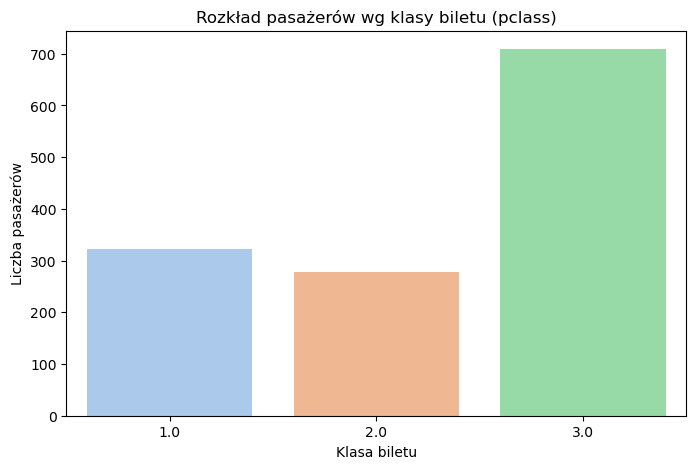

Klasa biletów procentowo:


,Liczba pasażerów,Udział (%)
3.0,709,54.12
1.0,323,24.66
2.0,277,21.15


In [9]:
# Rozkład zmiennej pclass
plt.figure(figsize=(8,5))
sns.countplot(x='pclass', hue='pclass', data=titanic_df, palette="pastel", legend=False)
plt.title('Rozkład pasażerów wg klasy biletu (pclass)')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

# pclass procentowo
pclass_counts = titanic_df['pclass'].value_counts()
pclass_percent = (pclass_counts / titanic_df.shape[0]) * 100

pclass_counts = pd.DataFrame({
    'Liczba pasażerów': pclass_counts,
    'Udział (%)': pclass_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Klasa biletów procentowo:")
display(pclass_counts)

### Wnioski:

1. **Rozkład klas**:

   - W analizie uwzględniono trzy klasy biletu: `1`, `2` i `3`.
   - Na wykresie słupkowym widoczna jest wyraźna **dominacja klasy 3**, czyli najtańszej.<br><br>

2. **Statystyka ilościowa i procentowa**:

   - **3. klasa** – najliczniejsza grupa, stanowili **ponad 54%** pasażerów.
   - **1. klasa** – około **25%** pasażerów.
   - **2. klasa** – około **21%**.
   - Oznacza to, że większość pasażerów podróżowała w najtańszej klasie, prawdopodobnie o niższym statusie społecznym.<br><br>

3. **Wnioski praktyczne**:

   - Klasa biletu może być jednym z kluczowych czynników wpływających na przeżycie – pasażerowie klasy 1 mieli lepszy dostęp do łodzi ratunkowych.
   - Wysoki udział klasy 3 sugeruje, że potencjalnie największe straty w katastrofie mogły wystąpić właśnie w tej grupie.
   - Różnice klas mogą też być powiązane z innymi cechami jak: płeć, wiek, miejsce zaokrętowania.

---

📌 **Podsumowanie**:

Zmienna `pclass` odzwierciedla wyraźne podziały społeczne wśród pasażerów Titanica.  
Najwięcej osób podróżowało w klasie 3, co może wpływać na przeżywalność – dlatego zmienna ta powinna być szczegółowo analizowana w kolejnych etapach.



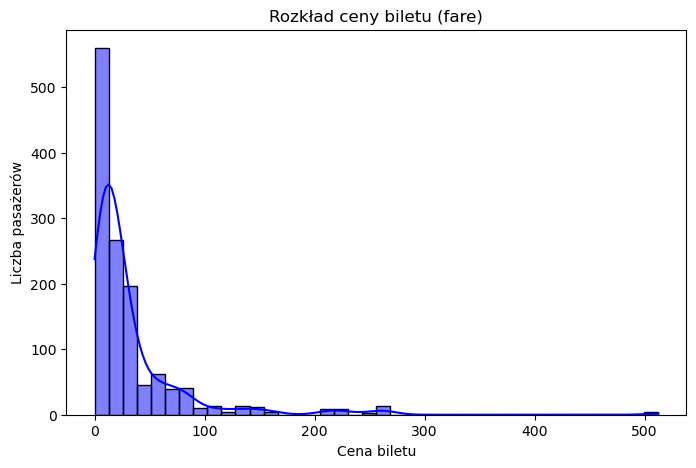

Cena biletów:


,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [10]:
# Zmienna "fare" (Cena biletu)

# Rozkład ceny biletu
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['fare'].dropna(), bins=40, kde=True, color='blue')
plt.title('Rozkład ceny biletu (fare)')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

fare_counts = titanic_df['fare'].value_counts()
fare_percent = (fare_counts / titanic_df.shape[0]) * 100

fare_description = pd.DataFrame(titanic_df['fare'].describe())

print("Cena biletów:")
display(fare_description)

### Wnioski:

1. **Rozkład ceny biletu**:

- Rozkład zmiennej `fare` jest wyraźnie **asymetryczny i silnie prawoskośny** – większość pasażerów zapłaciła stosunkowo niską cenę, ale występują pojedyncze, ekstremalnie wysokie wartości.
- Występują bilety **nawet o wartości 0**, co może oznaczać załogę, dzieci, osoby towarzyszące lub błędy w danych.

2. **Statystyka opisowa (wartości charakterystyczne)**:

| Statystyka | Wartość |
|------------|---------|
| Liczba obserwacji | 1308 |
| Średnia | ~33.30 |
| Mediana (50%) | ~14.45 |
| Maksimum | 512.33 |
| Minimum | 0.00 |
| Odchylenie standardowe | ~51.76 |

- **Mediana ceny biletu (14.45)** jest znacznie niższa niż średnia – potwierdza to wpływ ekstremalnie drogich biletów na ogólny rozkład.
- Wysoka wartość maksymalna (ponad **512 jednostek**) dotyczy prawdopodobnie bogatych pasażerów 1 klasy, podróżujących luksusowo lub w grupach rodzinnych.

3. **Wnioski praktyczne**:

- Zmienna `fare` może zawierać ważną informację o statusie społecznym pasażera – wyższe ceny są związane z wyższą klasą (`pclass = 1`) i potencjalnie większymi szansami przeżycia.
- Ze względu na silną skośność rozkładu, w dalszym modelowaniu może być wskazane wykonanie kategoryzacji cen (np. `niska`, `średnia`, `wysoka`).
- Warto również sprawdzić zależność ceny biletu od miejsca zaokrętowania (`embarked`) oraz powiązania z wiekiem i płcią.

---

📌 **Podsumowanie**:

Cena biletu (`fare`) to jedna z najbardziej zróżnicowanych zmiennych w zbiorze danych Titanica.  
Z jednej strony opisuje zdolności finansowe pasażera, z drugiej – potencjalny dostęp do środków ratunkowych (np. kabiny, łodzie).  
Zmienna ta niesie więc ważną wartość informacyjną i powinna być ujęta w dalszych analizach.


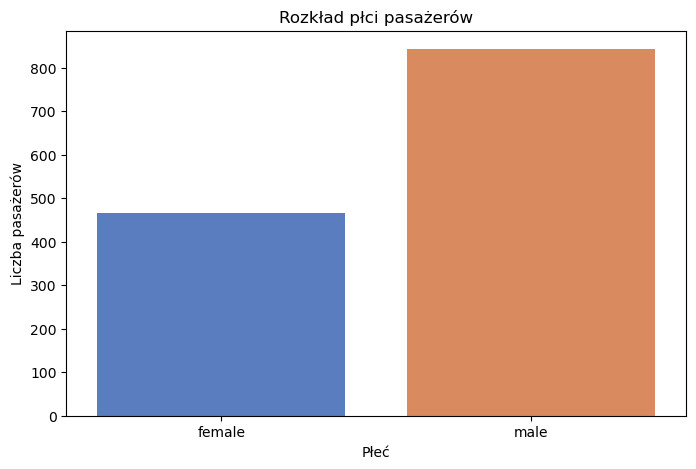

Płeć:


,Liczba pasażerów,Udział (%)
male,843,64.35
female,466,35.57


In [11]:
# 1. Rozkład zmiennej sex
plt.figure(figsize=(8,5))
sns.countplot(x='sex', hue='sex', data=titanic_df, palette="muted", legend=False)
plt.title('Rozkład płci pasażerów')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.show()

# sex procentowo
sex_counts = titanic_df['sex'].value_counts()
sex_percent = (sex_counts / titanic_df.shape[0]) * 100

sex_counts = pd.DataFrame({
    'Liczba pasażerów': sex_counts,
    'Udział (%)': sex_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Płeć:")
display(sex_counts)

### Wnioski:

1. **Rozkład płci**:

   - W zbiorze danych pasażerów Titanica występują dwie kategorie płci: `male` (mężczyzna) i `female` (kobieta).
   - Na wykresie słupkowym widać wyraźną dominację mężczyzn wśród pasażerów.<br><br>

2. **Statystyka ilościowa i procentowa**:

   - **Mężczyźni** stanowili **około 64%** wszystkich pasażerów.
   - **Kobiety** – tylko **około 36%**.
   - Oznacza to, że na pokładzie było prawie **dwukrotnie więcej mężczyzn** niż kobiet.<br><br>

3. **Wnioski praktyczne**:

   - Wysoka przewaga liczebna mężczyzn może mieć wpływ na przeżywalność gdyby Titanic stosował zasadę „kobiety i dzieci najpierw”.
   - Analiza płci powinna zostać uwzględniona jako kluczowy czynnik w dalszych etapach analizy.
   - Istotne będzie zbadanie przeżywalności w grupach: `mężczyzna vs kobieta`, szczególnie w połączeniu z klasą biletu i wiekiem.

---

📌 **Podsumowanie**:

Zmienna `sex` jest silnie niezrównoważona – mężczyzn było znacząco więcej niż kobiet.  
Ten fakt może mieć bezpośredni wpływ na wyniki analizy przeżycia i należy go uwzględnić jako jeden z najważniejszych czynników w dalszej eksploracji danych.


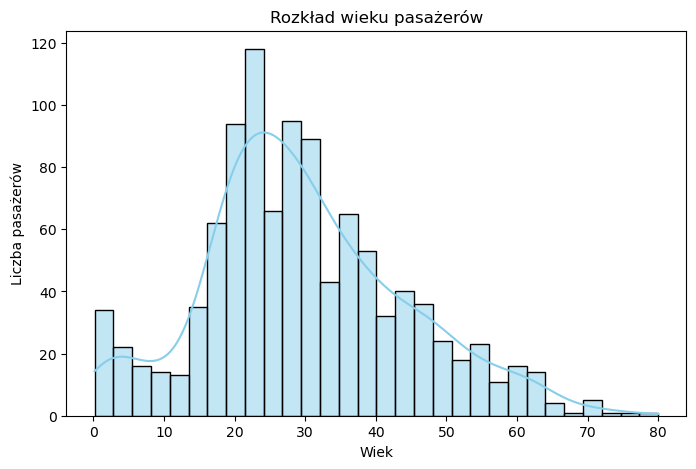

In [12]:
# Zmienna "age" (Wiek pasażera)

# Rozkład wieku
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Rozkład wieku pasażerów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

### Wnioski:

1. **Rozkład wieku**:

   - Wiek pasażerów ma **rozpływający się rozkład ciągły**, z zauważalną koncentracją w zakresie **20–40 lat**.
   - Występują pasażerowie w każdym wieku – od niemowląt (wiek ~0.17) aż po osoby starsze (do 80 lat).<br><br>

2. **Dominujące grupy wiekowe**:

   - Największą grupę stanowią **dorośli w wieku produkcyjnym**, co odzwierciedla typową strukturę społeczną w podróżach transatlantyckich w tamtym okresie.
   - Mniejszy udział mają dzieci (<12 lat) oraz osoby starsze (60+), choć ich obecność również jest zauważalna.<br><br>

3. **Rozkład i wnioski analityczne**:

   - Rozkład jest względnie ciągły i **niesymetryczny** – z lekkim przesunięciem w kierunku młodszych grup wiekowych.
   - Taki rozkład sprzyja **kategoryzacji wieku** (np. `dziecko`, `dorosły`, `senior`) w celu uproszczenia dalszej analizy i porównań międzygrupowych.

---

📌 **Podsumowanie**:

Zmienna `age` wnosi istotną wartość informacyjną do analizy pasażerów.  
Struktura wieku pasażerów pokazuje, że Titanic przewoził głównie osoby dorosłe, ale obecne były również dzieci i seniorzy.  
W kolejnych etapach warto wykorzystać wiek jako zmienną ciągłą oraz skategoryzowaną (`age_group`) – szczególnie w analizie przeżywalności.



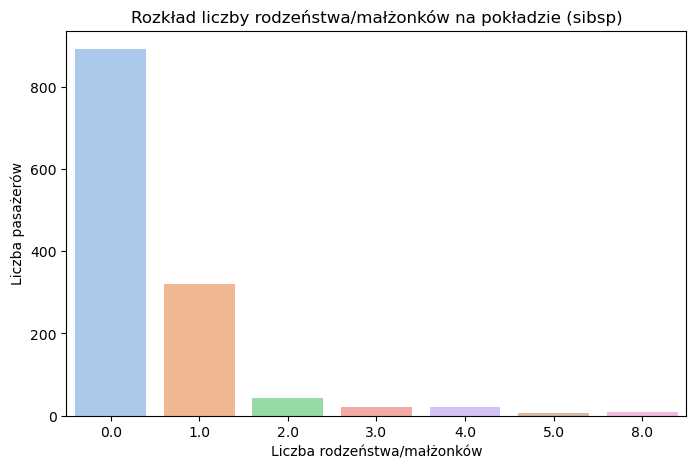

Ilość pasażerów posiadających rodzeństwo/małżonków na pokładzie:


,Liczba pasażerów,Udział (%)
0.0,891,68.02
1.0,319,24.35
2.0,42,3.21
4.0,22,1.68
3.0,20,1.53
8.0,9,0.69
5.0,6,0.46


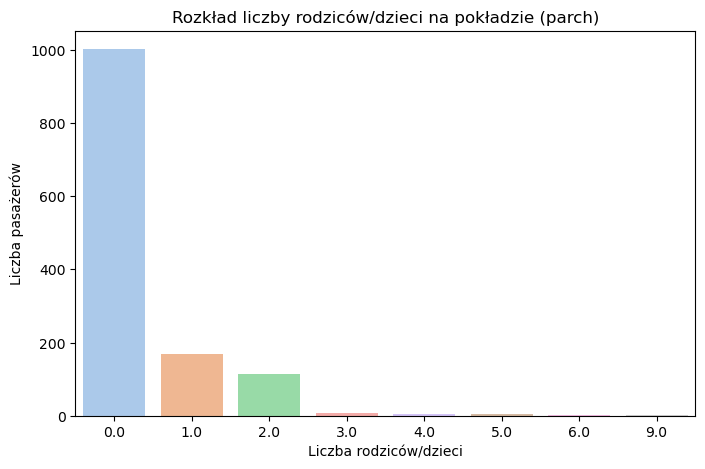

Ilość pasażerów posiadających rodziców/dzieci na pokładzie:


,Liczba pasażerów,Udział (%)
0.0,1002,76.49
1.0,170,12.98
2.0,113,8.63
3.0,8,0.61
4.0,6,0.46
5.0,6,0.46
6.0,2,0.15
9.0,2,0.15


In [13]:
# Zmienna "sibsp" (Liczba rodzeństwa/małżonków na pokładzie)

# Rozkład zmiennej sibsp
plt.figure(figsize=(8,5))
sns.countplot(x='sibsp', hue='sibsp', data=titanic_df, palette="pastel", legend=False)
plt.title('Rozkład liczby rodzeństwa/małżonków na pokładzie (sibsp)')
plt.xlabel('Liczba rodzeństwa/małżonków')
plt.ylabel('Liczba pasażerów')
plt.show()

sibsp_counts = titanic_df['sibsp'].value_counts()
sibsp_percent = (sibsp_counts / titanic_df.shape[0]) * 100

sibsp_counts = pd.DataFrame({
    'Liczba pasażerów': sibsp_counts,
    'Udział (%)': sibsp_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Ilość pasażerów posiadających rodzeństwo/małżonków na pokładzie:")
display(sibsp_counts)

# Zmienna "parch" (Liczba rodziców/dzieci na pokładzie)

# Rozkład zmiennej parch
plt.figure(figsize=(8,5))
sns.countplot(x='parch', hue='parch', data=titanic_df, palette="pastel", legend=False)
plt.title('Rozkład liczby rodziców/dzieci na pokładzie (parch)')
plt.xlabel('Liczba rodziców/dzieci')
plt.ylabel('Liczba pasażerów')
plt.show()

parch_counts = titanic_df['parch'].value_counts()
parch_percent = (parch_counts / titanic_df.shape[0]) * 100

parch_counts = pd.DataFrame({
    'Liczba pasażerów': parch_counts,
    'Udział (%)': parch_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Ilość pasażerów posiadających rodziców/dzieci na pokładzie:")
display(parch_counts)

### Wnioski:

#### 1. `sibsp` – Liczba rodzeństwa/małżonków na pokładzie:

- Wartości zmiennej `sibsp` wskazują, ile rodzeństwa lub małżonków dany pasażer miał ze sobą na pokładzie.
- Na wykresie słupkowym widać, że **większość pasażerów (ok. 68%) podróżowała samotnie** – wartość `sibsp = 0`.
- Około **24% pasażerów** podróżowało z **jedną osobą towarzyszącą** (rodzeństwo lub małżonek).
- Tylko nieliczni pasażerowie podróżowali z większą liczbą bliskich – występują też ekstremalne przypadki (np. 5 lub 8 towarzyszy).

#### 2. `parch` – Liczba rodziców/dzieci na pokładzie:

- Zmienna `parch` pokazuje, ile rodziców lub dzieci znajdowało się z pasażerem na pokładzie.
- Aż **76% pasażerów nie miało ze sobą żadnego rodzica ani dziecka** (`parch = 0`).
- Kolejne grupy (z 1–2 osobami) są już zdecydowanie mniejsze – tylko ok. **13% miało jednego** rodzica/dziecko, a **8.6% miało dwoje**.
- Występują także bardzo rzadkie przypadki pasażerów z 3–9 krewnymi.

---

#### Wnioski praktyczne:

- Większość pasażerów podróżowała samotnie lub z maksymalnie jednym członkiem rodziny.
- Można założyć, że **obecność rodziny mogła wpływać pozytywnie na szanse przeżycia** – pasażerowie w towarzystwie mogli być wspólnie ratowani, szybciej odnalezieni lub wcześniej wzywani do łodzi.
- Zmienna `sibsp` i `parch` może być szczególnie użyteczna w analizie przeżycia – np. jako podstawa do stworzenia nowej cechy `family_size` lub kategoryzacji (`samotny`, `mała rodzina`, `duża rodzina`).

---

📌 **Podsumowanie**:

Zmienne `sibsp` i `parch` dostarczają cennych informacji o strukturze rodzinnej pasażerów.  
Większość osób podróżowała bez bliskich krewnych, jednak ci, którzy mieli rodzinę, mogą wykazywać inne wzorce zachowań, szanse na przeżycie lub dostęp do zasobów w sytuacji kryzysowej.  
Dlatego warto wykorzystać te zmienne zarówno w dalszej analizie.


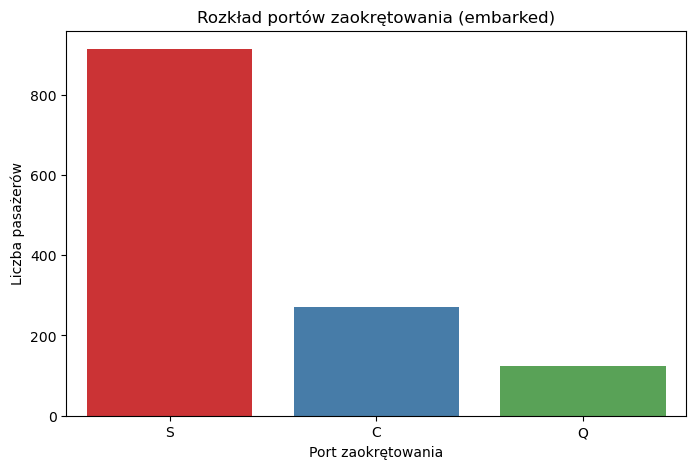

Ilość pasażerów wsiadających na pokład w poszczególnych portach:


,Liczba pasażerów,Udział (%)
S,914,69.77
C,270,20.61
Q,123,9.39


In [14]:
# Zmienna "embarked" (Port zaokrętowania)

# Rozkład portów zaokrętowania
plt.figure(figsize=(8,5))
sns.countplot(x='embarked', hue='embarked', data=titanic_df, palette="Set1", legend=False)
plt.title('Rozkład portów zaokrętowania (embarked)')
plt.xlabel('Port zaokrętowania')
plt.ylabel('Liczba pasażerów')
plt.show()

embarked_counts = titanic_df['embarked'].value_counts()
embarked_percent = (embarked_counts / titanic_df.shape[0]) * 100

embarked_counts = pd.DataFrame({
    'Liczba pasażerów': embarked_counts,
    'Udział (%)': embarked_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Ilość pasażerów wsiadających na pokład w poszczególnych portach:")
display(embarked_counts)

### Wnioski:

1. **Pełne nazwy portów zaokrętowania**:

W zbiorze danych `embarked` przyjmuje trzy kody literowe, które odpowiadają następującym portom:
- `S` – **Southampton** (Anglia)
- `C` – **Cherbourg** (Francja)
- `Q` – **Queenstown** (obecnie Cobh, Irlandia)

2. **Rozkład liczby pasażerów wg portu zaokrętowania**:

- Zdecydowana większość pasażerów, **około 70%**, wsiadła na pokład w **Southampton**.
- **Cherbourg** był drugim najczęściej wybieranym portem – około **21%** pasażerów.
- Najmniej pasażerów wsiadło w **Queenstown** – tylko **9%**.

3. **Wnioski praktyczne**:

- Zmienna `embarked` może wskazywać na różnice geograficzne i społeczne – warto połączyć ją z analizą klasy (`pclass`), ceny biletu (`fare`) i przeżycia (`survived`).
- Może się okazać, że pasażerowie z jednego z portów mieli większe szanse na przeżycie – będzie to szczególnie istotne w dalszej analizie relacji między zmiennymi.

---

📌 **Podsumowanie**:

Zmiana kodów portów `S`, `C`, `Q` na ich pełne nazwy (Southampton, Cherbourg, Queenstown) poprawiłaby czytelność analizy.  
Zmienna `embarked` pozwala lepiej zrozumieć kontekst geograficzny i społeczny pasażerów. Może być istotna w analizach warunków podróży i przeżywalności.


In [15]:
# Obliczenia unikalnych wartości dla zmiennych tekstowych
text_variables_summary = pd.DataFrame({
    'Zmienna': ['ticket', 'cabin', 'boat', 'body', 'home.dest'],
    'Liczba unikalnych wartości': [
        titanic_df['ticket'].nunique(),
        titanic_df['cabin'].nunique(),
        titanic_df['boat'].nunique(),
        titanic_df['body'].nunique(),
        titanic_df['home.dest'].nunique()
    ]
})

# Wyświetlenie tabeli
display(text_variables_summary)


,Zmienna,Liczba unikalnych wartości
0,ticket,929
1,cabin,186
2,boat,27
3,body,121
4,home.dest,369


### Wnioski – przegląd innych zmiennych:

1. **Numer biletu (`ticket`)**:
   - Występuje **929 unikalnych numerów biletów**.
   - Choć wielu pasażerów podróżowało wspólnie (np. rodziny), większość miała **indywidualne bilety**.
   - Format biletów jest zróżnicowany – zawiera cyfry i litery, co może sugerować różne linie rezerwacyjne lub klasy.<br><br>

2. **Kabina (`cabin`)**:
   - Zidentyfikowano **186 różnych oznaczeń kabin**, ale zmienna zawiera **bardzo dużo braków** (brak dla 77% pasażerów).
   - Przy dużej liczbie braków można rozważyć przekształcenie danych w cechę binarną typu: `czy posiadał kabinę (tak/nie)`.<br><br>

3. **Łódź ratunkowa (`boat`)**:
   - Znaleziono **27 unikalnych oznaczeń łodzi ratunkowych**.
   - Zmienna ta zawiera informację tylko dla pasażerów, którzy przeżyli i zostali przypisani do konkretnej łodzi.
   - Może być traktowana raczej jako zmienna pomocnicza, nie do modelowania przeżycia.<br><br>

4. **Numer ciała (`body`)**:
   - Występuje **121 unikalnych identyfikatorów ciał** – dotyczy tylko ofiar katastrofy, których ciała zostały odnalezione.
   - Zmienna ta zawiera ponad 90% braków – sugeruje marginalne zastosowanie do analizy przeżycia.<br><br>

5. **Miejsce docelowe (`home.dest`)**:
   - Pasażerowie deklarowali **369 różnych miejsc docelowych**.
   - Zmienna jest bardzo zróżnicowana i tekstowa – nie wydaje się być przydatna w dalszej analizie.

---

📌 **Podsumowanie**:

Zmienne tekstowe zawierają cenne, lecz często niekompletne informacje.  
Dla celów eksploracyjnych warto przekształcić niektóre z nich w bardziej użyteczne formy (np. binarne zmienne: `czy miał kabinę`, `czy odnaleziono ciało`).  
Zmienna `ticket` może być wykorzystana do tworzenia grup pasażerów, a `home.dest` może dać kontekst geograficzny, jeśli zostanie odpowiednio przetworzona.


---

## 📌 ETAP 3: Analiza poszczególnych kolumn - podsumowanie:

Analiza poszczególnych kolumn ujawniła duże różnice w strukturze pasażerów.  
Szczególnie istotne zmienne to: **płeć, wiek, klasa, port zaokrętowania, cena biletu oraz struktura rodziny**.  
Na podstawie tej analizy można już wyciągać pierwsze hipotezy nt. szans przeżycia, a także przygotować dane do dalszej obróbki.


## ETAP 4 – Transformacja Danych

Celem tego etapu jest przygotowanie danych do dalszej analizy. Transformacja danych polegać będzie na uzupełnieniu braków i transformacji zmiennych. Dzięki temu zbiór będzie bardziej kompletny, spójny i gotowy do analizy relacji między poszczególnymi zmiennymi.

W tym etapie wykonamy następujące działania:

1. **Uzupełnienie brakujących danych**:
   - `age` (wiek) – uzupełnienie medianą w zależności od płci.
   - `fare` (cena biletu) – uzupełnienie medianą.
   - `embarked` (port) – uzupełnienie najczęściej występującą wartością.<br><br>

2. **Transformacje zmiennych**:
   - Stworzenie nowej kolumny `cabin_bool` – informacja czy pasażer miał przypisaną kabinę.
   - Przekształcenie `age` do grup (`age_group`).
   - Zamiana liter w `embarked` na pełne nazwy portów.


PREZENTACJA DANYCH PO TRANSFORMACJI I UZUPEŁNIENIU:


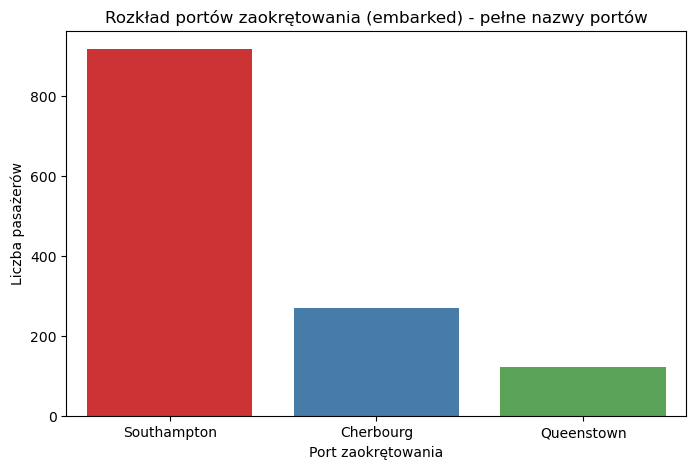

Ilość pasażerów wsiadających na pokład w poszczególnych portach:


,Liczba pasażerów,Udział (%)
Southampton,917,70.00
Cherbourg,270,20.61
Queenstown,123,9.39


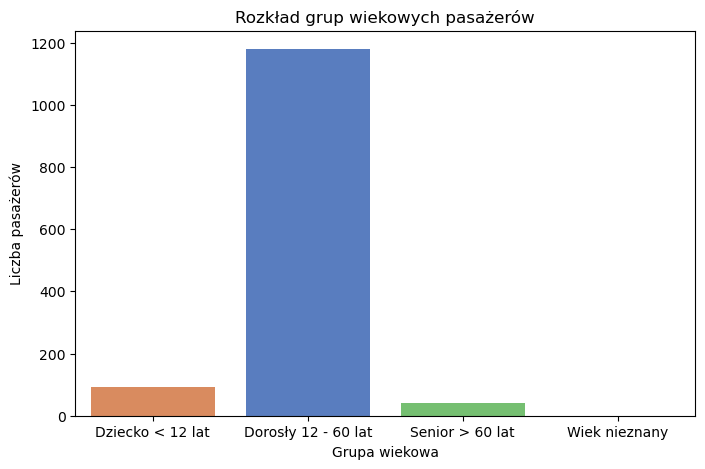

Przedziały wiekowe:


,Liczba pasażerów,Udział (%)
Dorosły 12 - 60 lat,1179,90.00
Dziecko < 12 lat,91,6.95
Senior > 60 lat,40,3.05


Liczba braków po uzupełnieniu:


,Zmienna,Liczba braków
0,age,0
1,fare,0
2,embarked,0


In [16]:
# Uzupełnianie braków i transformacje danych

# Uzupełnianie portu zaokrętowania (embarked)
titanic_df['embarked'] = titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

# Zamiana skrótów na pełne nazwy portów
titanic_df['embarked'] = titanic_df['embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

# Uzupełnienie ceny biletu (fare)
titanic_df['fare'] = titanic_df['fare'].fillna(titanic_df['fare'].median())

# Uzupełnienie wieku w oparciu o medianę dla płci
median_age_by_sex = titanic_df.groupby('sex')['age'].median()

def fill_age_by_sex(row):
    if pd.isnull(row['age']):
        if pd.notnull(row['sex']):
            return median_age_by_sex.loc[row['sex']]
        else:
            return titanic_df['age'].median()  # zapasowe rozwiązanie
    return row['age']

titanic_df['age'] = titanic_df.apply(fill_age_by_sex, axis=1)

# Dodanie kolumny: czy pasażer miał przypisaną kabinę
titanic_df['cabin_bool'] = titanic_df['cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

print("PREZENTACJA DANYCH PO TRANSFORMACJI I UZUPEŁNIENIU:")

# Rozkład portów zaokrętowania
plt.figure(figsize=(8,5))
sns.countplot(x='embarked', hue='embarked', data=titanic_df, palette="Set1", legend=False)
plt.title('Rozkład portów zaokrętowania (embarked) - pełne nazwy portów')
plt.xlabel('Port zaokrętowania')
plt.ylabel('Liczba pasażerów')
plt.show()

embarked_counts = titanic_df['embarked'].value_counts()
embarked_percent = (embarked_counts / titanic_df.shape[0]) * 100

embarked_counts = pd.DataFrame({
    'Liczba pasażerów': embarked_counts,
    'Udział (%)': embarked_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Ilość pasażerów wsiadających na pokład w poszczególnych portach:")
display(embarked_counts)

# Tworzymy przedziały wiekowe
def categorize_age(age):
    if pd.isnull(age):
        return 'Wiek nieznany'
    elif age < 12:
        return 'Dziecko < 12 lat'
    elif age < 60:
        return 'Dorosły 12 - 60 lat'
    else:
        return 'Senior > 60 lat'

titanic_df['age_group'] = titanic_df['age'].apply(categorize_age)

# Rozkład przedziałów wiekowych
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='age_group', data=titanic_df, order=['Dziecko < 12 lat', 'Dorosły 12 - 60 lat', 'Senior > 60 lat', 'Wiek nieznany'], palette="muted", legend=False)
plt.title('Rozkład grup wiekowych pasażerów')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pasażerów')
plt.show()

# Liczebność przedziałów wiekowych
age_group_counts = titanic_df['age_group'].value_counts()
age_group_percent = (age_group_counts / titanic_df.shape[0]) * 100

age_group_counts = pd.DataFrame({
    'Liczba pasażerów': age_group_counts,
    'Udział (%)': age_group_percent.round(2)
}).sort_values(by='Udział (%)', ascending=False)

print("Przedziały wiekowe:")
display(age_group_counts)

# Sprawdzenie, czy wszystkie istotne braki zostały uzupełnione
print("Liczba braków po uzupełnieniu:")

missing_after_transformation = titanic_df[['age', 'fare', 'embarked']].isnull().sum().reset_index()
missing_after_transformation.columns = ['Zmienna', 'Liczba braków']

display(missing_after_transformation)


## Wnioski – ETAP 4: Transformacja danych

1. **Uzupełniono brakujące dane**:
   - Port zaokrętowania (`embarked`) został uzupełniony najczęściej występującym portem (`Southampton`).
   - Cena biletu (`fare`) została uzupełniona medianą – dzięki temu uniknięto wypaczenia rozkładu przez wartości ekstremalne.
   - Wiek (`age`) został uzupełniony medianą obliczoną w grupach: `mężczyźni` i `kobiety`, co zapewnia większą trafność uzupełnień.<br><br>

2. **Zmieniono formaty i wzbogacono dane**:
   - Zmienna `embarked` została przekształcona – zamiast literowych kodów użyto pełnych nazw portów, co zwiększa czytelność.
   - Stworzono nową kolumnę `cabin_bool`, która informuje, czy pasażer miał przypisaną kabinę – może to być ważny czynnik w analizie przeżywalności.
   - Wiek został zaklasyfikowany do grup: `Dziecko`, `Dorosły`, `Senior`, co pozwala lepiej analizować różnice między grupami demograficznymi.

---

📌 **Podsumowanie**:

Dane zostały przygotowane do dalszej analizy. Braki w kluczowych kolumnach zostały uzupełnione, a dane zostały wzbogacone o dodatkowe cechy, które mogą poprawić trafność przyszłych analiz.  

## ETAP 5 – Analiza zależności między zmiennymi

Celem tego etapu jest zbadanie, które cechy pasażerów miały istotny wpływ na ich szanse przeżycia katastrofy.  
Analiza zależności pozwoli nam odkryć istotne wzorce i powiązania między zmiennymi objaśniającymi (np. wiek, płeć, klasa biletu) a zmienną docelową – `survived`.

Zbadamy m.in. zależność przeżywalności od:
- płci (`sex`)
- klasy (`pclass`)
- grupy wiekowej (`age_group`)
- portu zaokrętowania (`embarked`)
- posiadania kabiny (`cabin_bool`)
- liczby członków rodziny (`sibsp`, `parch`)


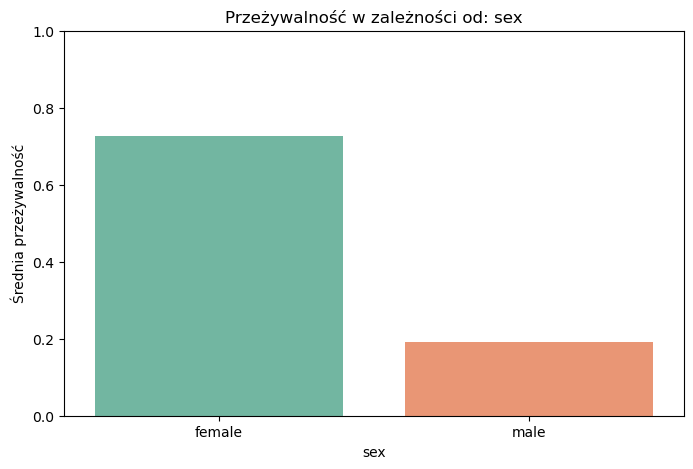

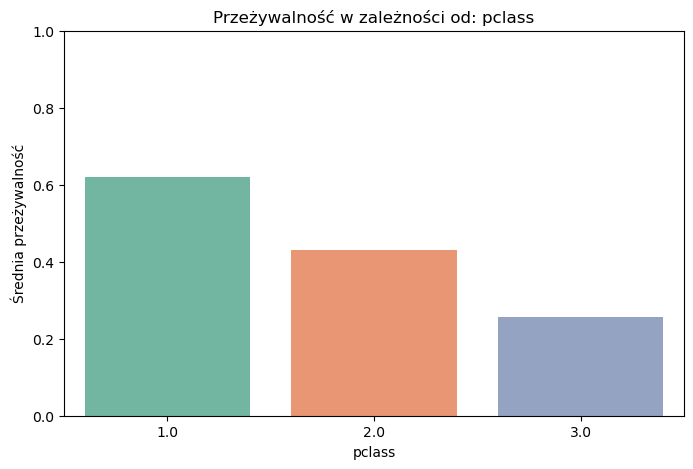

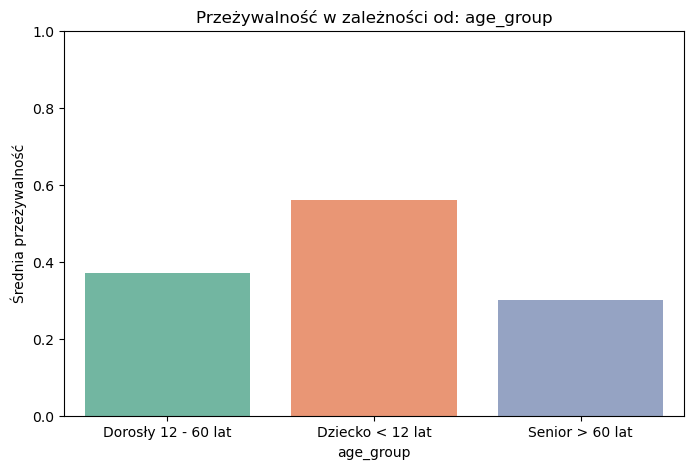

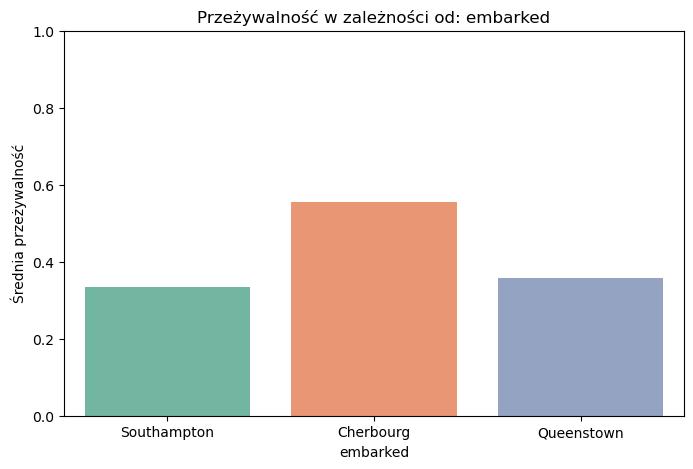

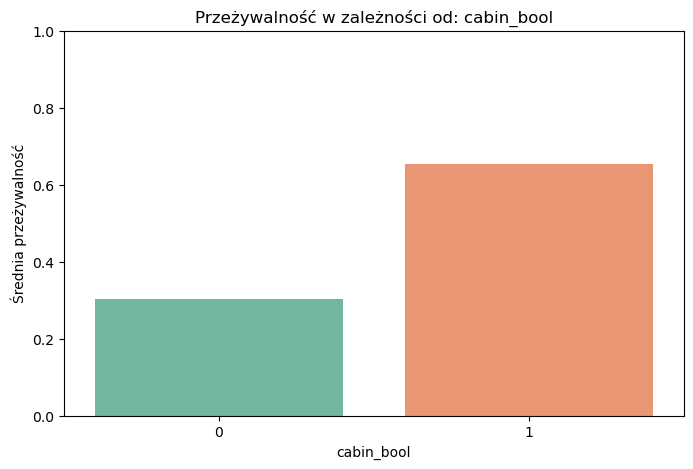

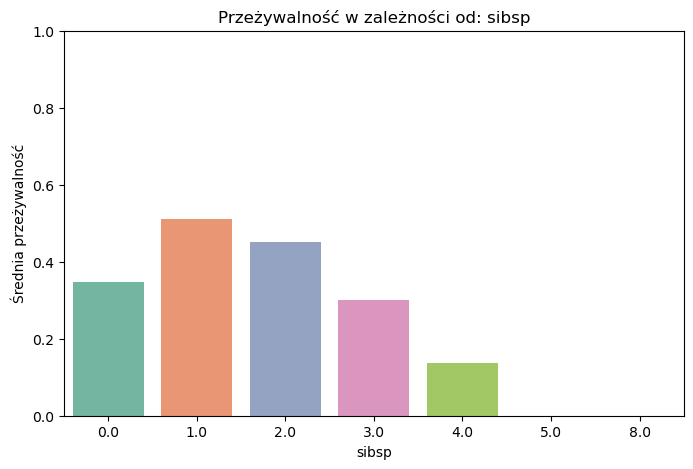

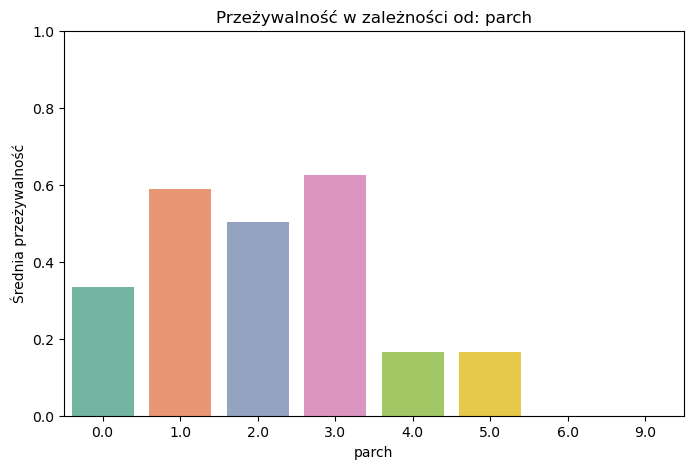

In [20]:
# Lista zmiennych kategorycznych do analizy z survived
kategorie = ['sex', 'pclass', 'age_group', 'embarked', 'cabin_bool', 'sibsp', 'parch']

# Tworzenie wykresów
for zmienna in kategorie:
    plt.figure(figsize=(8,5))
    sns.barplot(x=zmienna, y='survived', hue=zmienna, data=titanic_df, palette='Set2', errorbar=None, legend=False)
    plt.title(f'Przeżywalność w zależności od: {zmienna}')
    plt.ylabel('Średnia przeżywalność')
    plt.xlabel(zmienna)
    plt.ylim(0, 1)
    plt.show()

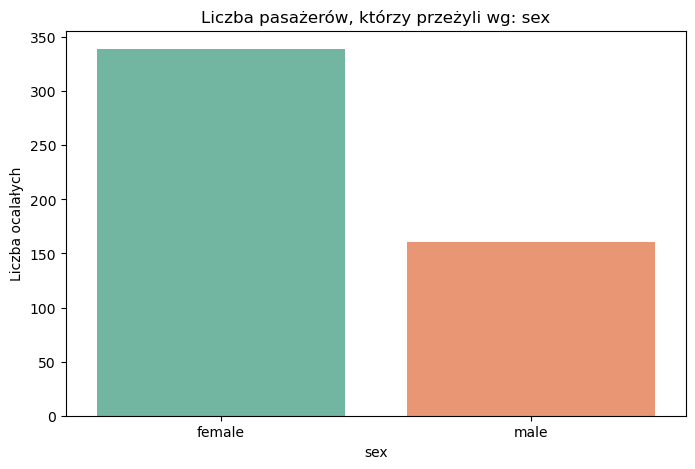

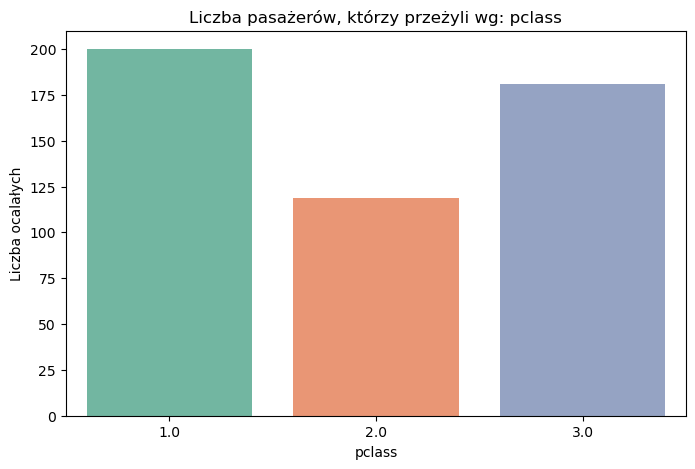

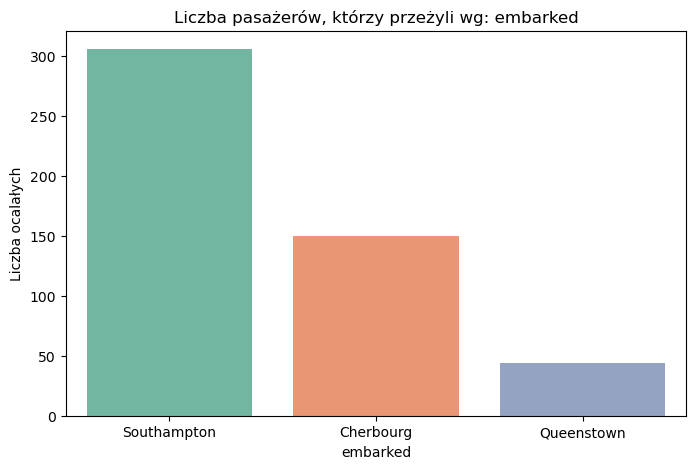

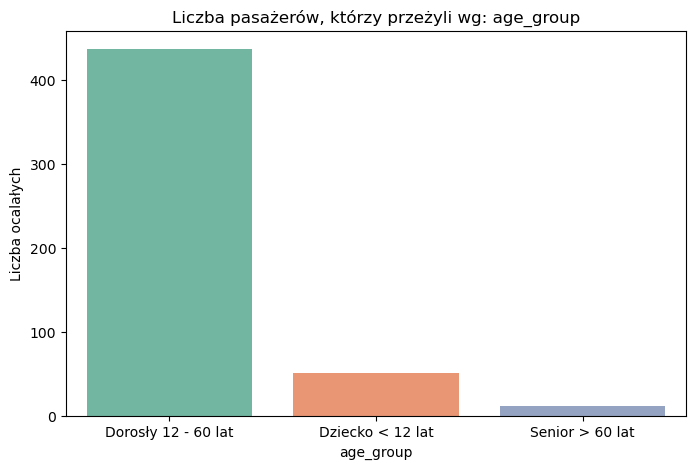

In [23]:
for zmienna in ['sex', 'pclass', 'embarked', 'age_group']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=zmienna, hue=zmienna, data=titanic_df[titanic_df['survived'] == 1], palette="Set2", legend=False)
    plt.title(f'Liczba pasażerów, którzy przeżyli wg: {zmienna}')
    plt.ylabel('Liczba ocalałych')
    plt.xlabel(zmienna)
    plt.show()


### Wnioski:

1. **Płeć (`sex`)**:
   - Kobiety miały znacząco większą szansę na przeżycie niż mężczyźni (~73% vs ~19%).
   - Potwierdza się zasada "kobiety i dzieci pierwsze".

2. **Klasa (`pclass`)**:
   - Pasażerowie klasy 1 przeżyli znacznie częściej niż pasażerowie klasy 3 (~62% vs ~25%).
   - Klasa biletu silnie koreluje z dostępem do ratunku.

3. **Grupa wiekowa (`age_group`)**:
   - Największą szansę miały dzieci, potem dorośli, najmniejszą – seniorzy.

4. **Port zaokrętowania (`embarked`)**:
   - Najwyższa przeżywalność była wśród pasażerów z **Cherbourga** (~55%), najniższa z **Southampton** (~33%).

5. **Posiadanie kabiny (`cabin_bool`)**:
   - Pasażerowie z przypisaną kabiną mieli ~65% szans przeżycia, bez kabiny tylko ~30%.

6. **Rodzina na pokładzie (`sibsp`, `parch`)**:
   - Najlepsze wyniki miały osoby podróżujące z 1–2 członkami rodziny.
   - Podróżowanie samotnie lub z bardzo dużą rodziną obniżało szanse przeżycia.

---

📌 **Podsumowanie**:

Zależność między zmiennymi a przeżyciem jest wyraźna – czynniki takie jak **płeć, klasa biletu, wiek oraz struktura rodziny** znacząco wpływały na los pasażerów.  
Analiza pokazała, że przeżywalność nie była przypadkowa – a silnie związana z uwarunkowaniami społecznymi, logistycznymi i demograficznymi.  
W kolejnym kroku możemy przejść do analizy wartości odstających i przygotowania danych do modelowania.


## 📉 ETAP 6 – Analiza wartości odstających

Celem tego etapu jest identyfikacja wartości odstających (outliers), które mogą znacząco wpływać na analizę i modelowanie.  
Wartości odstające to dane, które znacząco odbiegają od reszty obserwacji – mogą być błędami pomiaru, przypadkami ekstremalnymi lub rzeczywistymi wyjątkami.

W analizie skupimy się na dwóch kluczowych zmiennych numerycznych:
- `age` – wiek pasażera
- `fare` – cena biletu

Do wykrywania odstających wartości wykorzystamy **boxploty**, które pozwalają łatwo zidentyfikować wartości wykraczające poza zakres (IQR ± 1.5×IQR).


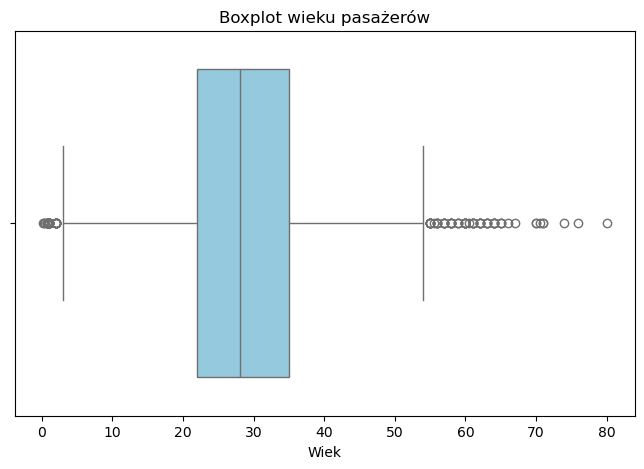

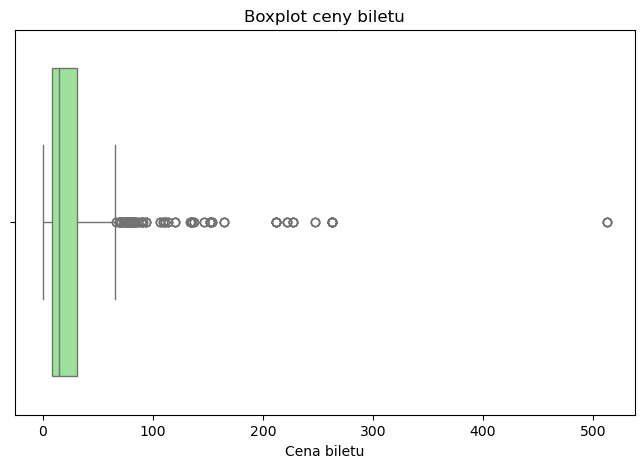

Liczba ekstremalnych przypadków wiekowych (99. percentyl): 13
Liczba ekstremalnie wysokich cen biletów (99. percentyl): 10


In [21]:
# 1. Boxplot dla wieku
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic_df['age'], color='skyblue')
plt.title('Boxplot wieku pasażerów')
plt.xlabel('Wiek')
plt.show()

# 2. Boxplot dla ceny biletu
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic_df['fare'], color='lightgreen')
plt.title('Boxplot ceny biletu')
plt.xlabel('Cena biletu')
plt.show()

# 3. Wydruk wartości odstających powyżej 99. percentyla
age_outliers = titanic_df[titanic_df['age'] > titanic_df['age'].quantile(0.99)]
fare_outliers = titanic_df[titanic_df['fare'] > titanic_df['fare'].quantile(0.99)]

print("Liczba ekstremalnych przypadków wiekowych (99. percentyl):", age_outliers.shape[0])
print("Liczba ekstremalnie wysokich cen biletów (99. percentyl):", fare_outliers.shape[0])

### 📊 Wnioski – ETAP 6: Analiza wartości odstających

1. **Wiek (`age`)**:
   - Rozkład wieku jest relatywnie równomierny, ale kilka przypadków znacznie przekracza górny kwartyl (70+ lat).
   - Wartości powyżej **65–70 lat** można uznać za odstające – są to najstarsi pasażerowie (np. 74–80 lat).

2. **Cena biletu (`fare`)**:
   - Rozkład ceny biletu jest silnie **skośny** – większość biletów mieści się poniżej 100 jednostek.
   - Występują bardzo wysokie ceny biletów (ponad 500), przypisane do pasażerów klasy 1 podróżujących luksusowo.
   - Bilety powyżej 300 jednostek stanowią tylko 1% obserwacji, ale znacząco wpływają na średnią.

3. **Wnioski praktyczne**:

   - Wartości odstające nie muszą być błędami – w tym przypadku reprezentują realnych pasażerów (bogatych lub starszych).
   - W dalszej analizie warto:
     - zastosować transformacje (np. logarytmiczną dla `fare`),
     - rozważyć wykluczenie ekstremalnych przypadków przy modelowaniu regresyjnym lub klasyfikacyjnym.

---

📌 **Podsumowanie**:

Wartości odstające w zmiennych `age` i `fare` są realne, ale znaczące – mogą wpływać na rozkład, średnią i wyniki modeli predykcyjnych.  
Zalecane jest ich dalsze monitorowanie i przetwarzanie – niekoniecznie usuwanie, ale odpowiednie traktowanie (np. transformacja, kategoryzacja).


# 🧠 Wnioski końcowe – Eksploracyjna Analiza Danych (EDA) Titanic

Analiza EDA pozwoliła na głębokie zrozumienie struktury danych dotyczących pasażerów Titanica. Dzięki systematycznemu podejściu zidentyfikowano najważniejsze cechy wpływające na przeżycie oraz przygotowano dane do dalszych etapów modelowania.

---

### 🔍 Najważniejsze obserwacje:

1. **Rozkład i braki w danych**:
   - Dane zawierają 1310 rekordów i 14 kolumn.
   - Najwięcej braków występowało w kolumnach: `age`, `fare`, `embarked`, `cabin`, `body`, `boat`.
   - Braki w `age`, `fare` i `embarked` zostały uzupełnione na podstawie mediany lub najczęstszej wartości.

2. **Demografia pasażerów**:
   - Większość pasażerów to mężczyźni (64%) i osoby dorosłe w wieku 20–40 lat.
   - Najwięcej pasażerów pochodziło z Southampton i podróżowało w 3 klasie.

3. **Struktura rodzinna**:
   - Większość pasażerów podróżowała samotnie.
   - Pasażerowie podróżujący z 1–2 członkami rodziny mieli wyższą przeżywalność.

4. **Cena biletu i kabina**:
   - Ceny biletów były bardzo zróżnicowane (od 0 do ponad 500 jednostek), z rozkładem mocno prawoskośnym.
   - Posiadanie kabiny silnie wiązało się z wyższą szansą na przeżycie.

5. **Zależności od przeżycia**:
   - Największy wpływ na przeżycie miały:
     - **płeć** (kobiety przeżywały znacznie częściej),
     - **klasa biletu** (pasażerowie 1 klasy przeżywali częściej),
     - **wiek** (dzieci miały wyższą przeżywalność),
     - **port zaokrętowania** (największy odsetek ocalałych z Cherbourga).

6. **Wartości odstające**:
   - Zidentyfikowano nieliczne, ale istotne wartości odstające w wieku (seniorzy powyżej 70 lat) i cenie biletu (luksusowe bilety powyżej 300 jednostek).
   - Wartości te należy rozważyć przy transformacjach lub kategoryzacji.

---

### 📌 Ogólna konkluzja:

Dane Titanic są bogate i wielowymiarowe – zawierają silne sygnały społeczne, logistyczne i demograficzne.  
Przeżycie w katastrofie było silnie uwarunkowane cechami pasażera, takimi jak płeć, klasa, wiek, struktura rodziny czy miejsce wejścia na pokład.

Analiza EDA ujawniła konkretne wzorce, potwierdziła hipotezy historyczne i przygotowała dane do dalszego modelowania predykcyjnego.


